In [1]:
!pip install numpy matplotlib scipy

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from operator import attrgetter
from scipy.signal import savgol_filter

from config import load_from_yaml, Config

# Util functions for plotting

In [19]:
def load_config_and_data(method: str, hyperparameter: str):
    hyperparameter_value_data = {}

    for config_path in Path(f"configs/{method}/{hyperparameter}").glob("*.yaml"):
        print(config_path)
        c = load_from_yaml(str(config_path))
        value = attrgetter(hyperparameter)(c)
        
        if isinstance(value, list):
            value = tuple(value)

        print(hyperparameter, value)
        data_path = Path(f"results/{method}/{hyperparameter}/{config_path.stem}.npy")
        hyperparameter_value_data[value] = np.load(data_path)



    hyperparameter_values = [] # values of the hyperparameter we iterate in order
    data = []

    for v,d in sorted(hyperparameter_value_data.items(), key = lambda i: i[0]):
        hyperparameter_values.append(v)
        data.append(d)
    data = np.array(data) # transfor python list to numpy array
    return data, hyperparameter_values

def preprocess_data(data: np.ndarray, window_length = 51):
    avg_data = savgol_filter(np.average(data, axis=1), window_length=window_length, polyorder=1, axis=1)
    std_data = savgol_filter(np.std(data, axis=1) / np.sqrt(data.shape[1]), window_length=window_length, polyorder=1, axis=1)
    return avg_data, std_data


def plot(method: str, display_name: str, hyperparameter_values, avg_data: np.ndarray, std_data: np.ndarray|None = None, random_agent_reward: float|None = None):
    fig,ax = plt.subplots()
    ax.set_title(f"{method} {display_name}")
    ax.set_xlabel('Episode')
    ax.set_ylabel('Total Reward')
    if random_agent_reward is not None:
        ax.axhline(random_agent_reward,ls='--',c='k',label="random")

    for i,v in enumerate(hyperparameter_values):
        ax.plot(avg_data[i], label=f"{display_name}: {v}")
        if std_data is not None:
            ax.fill_between(range(data.shape[2]), avg_data[i]-std_data[i], avg_data[i]+std_data[i], alpha=0.2)

    ax.legend()

    fig_path=f"assets/figs/{method}/{hyperparameter}.png"
    Path(fig_path).parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(fig_path,dpi=300)

# Random Agent

configs/RandomAgent/policy/policy-1.yaml
policy random
Average reward of a random agent 22.4


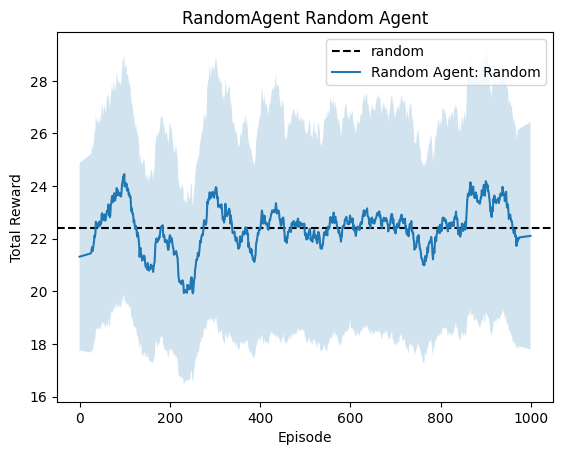

In [20]:
method = "RandomAgent"
hyperparameter = "policy" # just some hyperparameter as a placeholder

data, _ = load_config_and_data(method, hyperparameter)
avg_data, std_data = preprocess_data(data)

random_agent_reward = np.round(np.mean(avg_data), 1)
print("Average reward of a random agent", random_agent_reward)
plot(method=method, display_name="Random Agent", hyperparameter_values=["Random"], avg_data=avg_data, std_data=std_data, random_agent_reward=random_agent_reward)

# DQN with ER and TN

In [39]:
# DQN: DQN with ER and TN
# DQN-ER: DQN without ER but with TN
# DQN-TR: DQN with ER but without TN
# DQN-ER-TN: DQN without ER and without TN
method = "DQN"


# hyperparameter_displayname = ("epsilon.initial", "Initial Epsilon")
# hyperparameter_displayname = ("gamma", "Gamma")
hyperparameter_displayname = ("learning_rate", "Learning Rate")
# hyperparameter_displayname = ("nn_architecture", "NN Architecture")
# hyperparameter_displayname = ("sampling_rate", "Batch size")
# hyperparameter_displayname = ("temp.initial", "Initial Temp")


hyperparameter, display_name = hyperparameter_displayname

In [40]:
data, hyperparameter_values = load_config_and_data(method, hyperparameter)
print("Data shape", data.shape)

avg_data, std_data = preprocess_data(data)
print("Averaged data shape", avg_data.shape)

configs/DQN/learning_rate/learning_rate-4.yaml
learning_rate 0.0001
configs/DQN/learning_rate/learning_rate-2.yaml
learning_rate 0.01
configs/DQN/learning_rate/learning_rate-5.yaml
learning_rate 0.0005
configs/DQN/learning_rate/learning_rate-3.yaml
learning_rate 0.1
configs/DQN/learning_rate/learning_rate-1.yaml
learning_rate 0.001
Data shape (5, 5, 1000)
Averaged data shape (5, 1000)


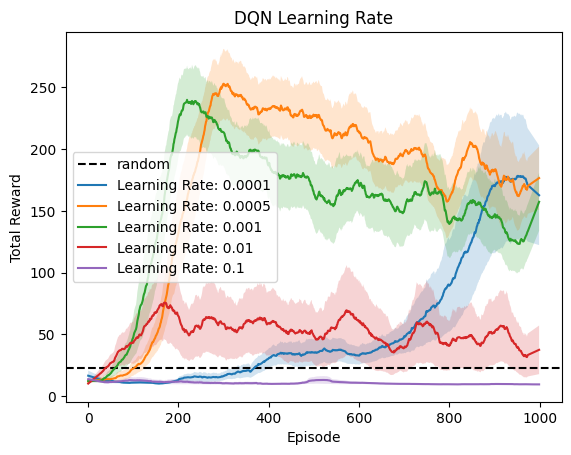

In [41]:
plot(method=method, display_name=display_name, hyperparameter_values=hyperparameter_values, avg_data=avg_data, std_data=std_data, random_agent_reward=random_agent_reward)